In [1]:
# Import required libraries and dependencies
# importing necessary libraries such as pandas, hvPlot, and scikit-learn modules
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the data into a Pandas DataFrame
# <pd.read_csv()> loads the cryptocurrency market data from the CSV file
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
# <df_market_data.describe()> : generates summary statistics of the dataset
# including count, mean, standard deviation, minimum, and maximum values
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# <StandardScaler()> : from scikit-learn is used to scale the data
scaler = StandardScaler()


In [6]:
df_market_data.index.tolist()

['bitcoin',
 'ethereum',
 'tether',
 'ripple',
 'bitcoin-cash',
 'binancecoin',
 'chainlink',
 'cardano',
 'litecoin',
 'bitcoin-cash-sv',
 'crypto-com-chain',
 'usd-coin',
 'eos',
 'monero',
 'tron',
 'tezos',
 'okb',
 'stellar',
 'cosmos',
 'cdai',
 'neo',
 'wrapped-bitcoin',
 'leo-token',
 'huobi-token',
 'nem',
 'binance-usd',
 'iota',
 'vechain',
 'zcash',
 'theta-token',
 'dash',
 'ethereum-classic',
 'ethlend',
 'maker',
 'havven',
 'omisego',
 'celsius-degree-token',
 'ontology',
 'ftx-token',
 'true-usd',
 'digibyte']

In [7]:
# Create a DataFrame with the scaled data
# <df_scaled> : The scaled data is stored in a new DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
# <crypto_names> : Cryptocurrency names are copied from the original data into a list
crypto_names = df_market_data.index.tolist()

# Set the coinid column as index
# index of the scaled DataFrame is set to match the index of the original
df_scaled.index = df_market_data.index

# Display sample data
# <.head()> displays the top ten 
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)


In [9]:
# Create an empty list to store the inertia values
# A range of k values from 1 to 11 is iterated over
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/p

In [10]:
# Create a dictionary with the data to plot the Elbow curve
# <df_elbow> : The k values and corresponding inertia values are stored in a DataFrame
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k_values,inertia_values
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.101806
6,7,46.035250
7,8,37.284807
8,9,32.161417
9,10,28.075253


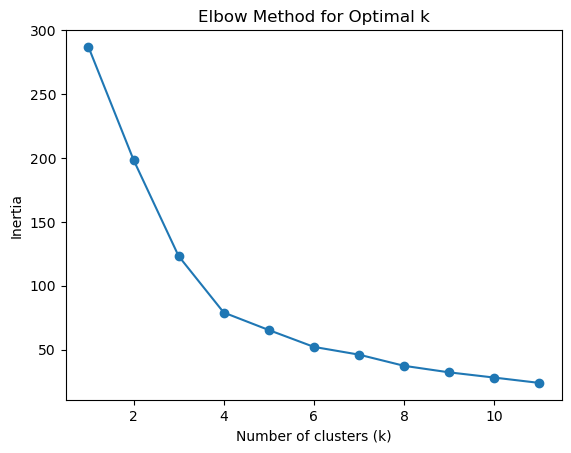

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# elbow curve is plotted
elbow_curve_original = plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: The elbow method displays that the best value of k would appear to be around k=4.** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
best_k = 4
# KMeans model is initialized with the best value
kmeans = KMeans(n_clusters=best_k, random_state=0)


In [13]:
# Fit the K-Means model using the scaled data
# model is fitted to the scaled data
kmeans.fit(df_scaled)


/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(df_scaled)


# Print the resulting array of cluster values.
# <print()> used to print out the variable 
print(clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [15]:
# Create a copy of the DataFrame
# <.copy()> copies the dataframe into the variable <df_clustered>
df_clustered = df_market_data.copy()


In [16]:
# Add a new column to the DataFrame with the predicted clusters
# <df_clustered> cluster labels are added as a new column to the original DataFrame
df_clustered['cluster'] = clusters


# Display sample data
df_clustered


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,2


In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_clustered.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster', hover_cols=['coin_id'])



:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
# PCA model is created to reduce the dimensionality of the data
pca = PCA(n_components=3)


In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
# The PCA model is applied into three principal components
pca_data = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
# <print()> is sued to display the variable 
print(pca_data[:5])


[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
# Explained variance ratios are computed
explained_variance = pca.explained_variance_ratio_
# <print()> is usef to display a message
print("Explained Variance:", explained_variance)


Explained Variance: [0.3719856  0.34700813 0.17603793]


In [21]:
sum(explained_variance)


0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: Total Explained Variance of the Three Principal Components: 0.8950316570309841** 

In [22]:
total_explained_variance = sum(explained_variance)
print("Total Explained Variance of the Three Principal Components:", total_explained_variance)


Total Explained Variance of the Three Principal Components: 0.8950316570309841


In [23]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data.index


# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)


# Display sample data
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values from 1 to 11
k_values_2 = range(1, 12)


In [25]:
# Create an empty list to store the inertia values
inertia_values_2 = []


# Create a for loop to compute the inertia with each possible value of k
# the elbow method is applied to find the best value for k using the PCA-transformed data
for k in k_values_2:

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca)
# 3. Append the model.inertia_ to the inertia list
    inertia_values_2.append(kmeans.inertia_)


/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/p

In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k_values": k_values_2, "inertia_values": inertia_values_2}

# Create a DataFrame with the data to plot the Elbow curve
# <pd.DataFrame()> used to create a new dataframe from the dictionary created 
df_elbow_pca = pd.DataFrame(elbow_data_pca)


In [27]:
df_elbow_pca

,k_values,inertia_values
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.182776
7,8,17.016962
8,9,13.668325
9,10,10.484890


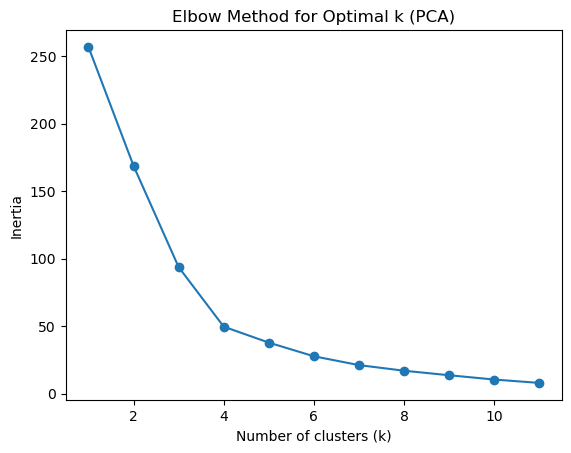

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Inertia values are computed for different k values, and an elbow curve is plotted
elbow_curve_pca = plt.plot(df_elbow_pca['k_values'], df_elbow_pca['inertia_values'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA)')
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: The elbow method suggests that the best value for k is would be k=4.**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: The optimal k value when using PCA data seems to be consistent with the optimal k value found using the original data.** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4
# KMeans model is initialized and fitted to the PCA-transformed data using the best value for k 
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)


In [30]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)

/Users/wilianushca/anaconda3/envs/PythonData_2023_08/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [31]:
# Predict the clusters to group the cryptocurrencies using the PCA data
# <.predic()> Cluster labels are predicted
clusters_pca = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values.
print(clusters_pca)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [32]:
df_pca

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [33]:
# Create a copy of the DataFrame with the PCA data
df_clustered_pca = df_pca.copy()


# Add a new column to the DataFrame with the predicted clusters
# Cluster labels added to a new DataFrame named <df_clustered_pca>
df_clustered_pca['cluster'] = clusters_pca


# Display sample data
# <.head()> used to display the top ten 
df_clustered_pca.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [34]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# A scatter plot using hvPlot is created to visualize the clusters
df_clustered_pca.hvplot.scatter(x='PC1', y='PC2', by='cluster', hover_cols=['coin_id'])


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [35]:
# Composite plot to contrast the Elbow curves
# A scatter plot using hvPlot is created to visualize the clusters
elbow_curve_original = df_elbow.hvplot.scatter(x='k_values', y='inertia_values', xlabel='Number of clusters (k)', ylabel='Inertia', title='Elbow Method for Optimal k', marker='o')
# A scatter plot using hvPlot is created to visualize the clusters
elbow_curve_pca = df_elbow_pca.hvplot.scatter(x='k_values', y='inertia_values', xlabel='Number of clusters (k)', ylabel='Inertia', title='Elbow Method for Optimal k (PCA)', marker='o')

# plots are generated for both the original and PCA-transformed data
(elbow_curve_original + elbow_curve_pca).cols(1)


:Layout
   .Scatter.I  :Scatter   [k_values]   (inertia_values)
   .Scatter.II :Scatter   [k_values]   (inertia_values)

In [36]:
# Composite plot to contrast the clusters

# A scatter plot using hvPlot is created to visualize the clusters
(df_clustered.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster', hover_cols=['coin_id']) +
 df_clustered_pca.hvplot.scatter(x='PC1', y='PC2', by='cluster', hover_cols=['coin_id'])
).cols(1)


:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: Using fewer features (after PCA) to cluster the data seems to provide similar clustering results compared to using all features. The PCA method captures the variance in the data while reducing dimensionality**